# EDA

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format

## Import data

In [3]:

cat = pd.read_pickle('../../02_Data/03_Work/cat_result_quality.pickle')
num = pd.read_pickle('../../02_Data/03_Work/num_result_quality.pickle')


## EDA Categorics

In [4]:
variables = ['employment_duration', 
             'verified_income', 
             'rating', 'housing',
             'purpose', 'num_installments', 'status']

In [5]:
def frequencies_cat(df_cat):
    #ensure str in all columns
    df_cat = df_cat.astype(str)
    
    result = df_cat[variables].apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Value',0: "Frequency"})\
                .sort_values(by = ['Variable','Frequency'])
    return(result)


In [6]:
frequencies_cat(cat)

,Variable,Value,Frequency
9,employment_duration,9 years,0.04
8,employment_duration,8 years,0.04
7,employment_duration,7 years,0.04
6,employment_duration,6 years,0.05
4,employment_duration,4 years,0.06
5,employment_duration,5 years,0.06
11,employment_duration,unknown,0.06
0,employment_duration,1 year,0.07
3,employment_duration,3 years,0.08
10,employment_duration,< 1 year,0.09


In [7]:
def plot_eda_categoricals(cat):
    
    #Calculate number of rows we need
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #Define the graph
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    # Flatten to iterate through the graph as if it ose 1D instead of 2D
    ax = ax.flat 

    # Create the loop that adds graphs
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

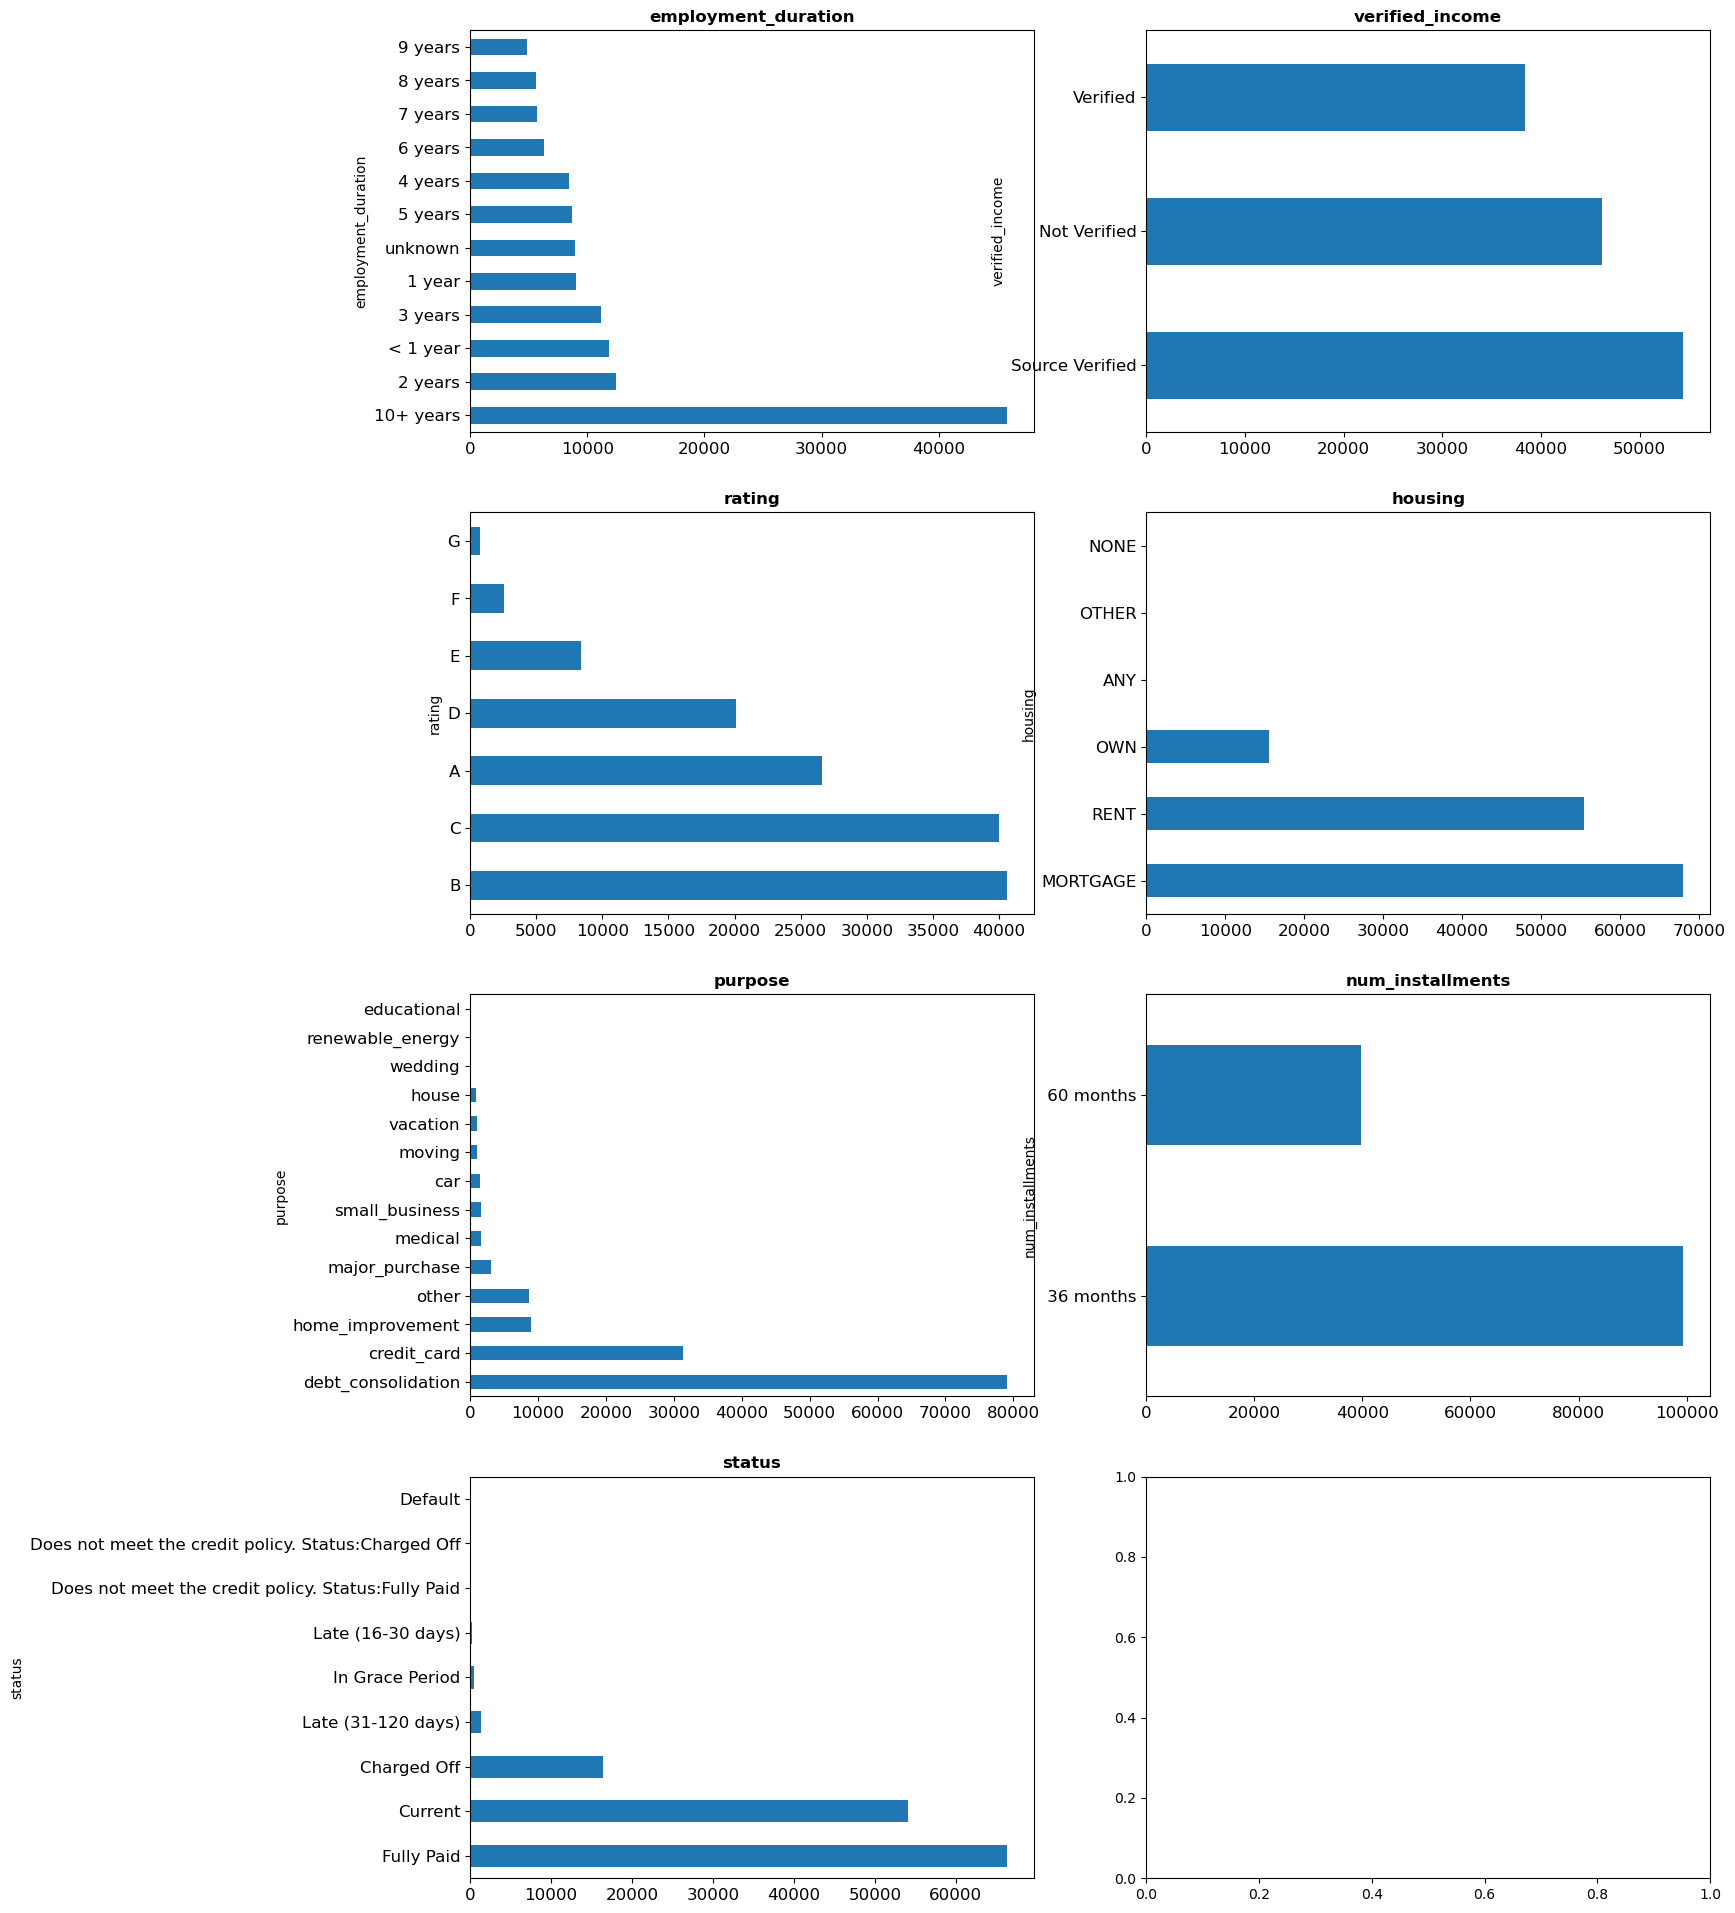

In [8]:
plot_eda_categoricals(cat[variables])

## EDA Numerics

In [9]:
def stats_cont(num):
    
    stats = num.describe().T
    stats['median'] = num.median()
    stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(stats)
stats_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
income,"139,056.00","75,008.65","65,000.00","42,246.23",0.00,"46,000.00","65,000.00","92,000.00","300,000.00"
dti,"139,056.00",18.88,17.89,14.93,-1.00,12.00,17.89,24.53,999.00
num_mortgages,"139,056.00",1.50,1.00,1.88,0.00,0.00,1.00,2.00,32.00
num_credit_lines,"139,056.00",11.61,11.00,5.63,0.00,8.00,11.00,14.00,84.00
pct_cards_75p,"139,056.00",41.08,33.30,36.46,0.00,0.00,33.30,66.70,100.00
pct_revolving_utilization,"139,056.00",50.33,50.30,24.73,0.00,31.60,50.30,69.30,184.60
num_cancellations_12months,"139,056.00",0.01,0.00,0.11,0.00,0.00,0.00,0.00,7.00
num_derogatories,"139,056.00",0.20,0.00,0.57,0.00,0.00,0.00,0.00,46.00
months_since_last_delinquency,"139,056.00",16.79,0.00,23.02,0.00,0.00,0.00,31.00,195.00
principal,"139,056.00","14,976.20","12,800.00","9,142.59",500.00,"8,000.00","12,800.00","20,000.00","40,000.00"


In [10]:
def graph_eda_cont(num):
    
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    ax = ax.flat 

    for each, variable in enumerate(num):
        num[variable].plot.density(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

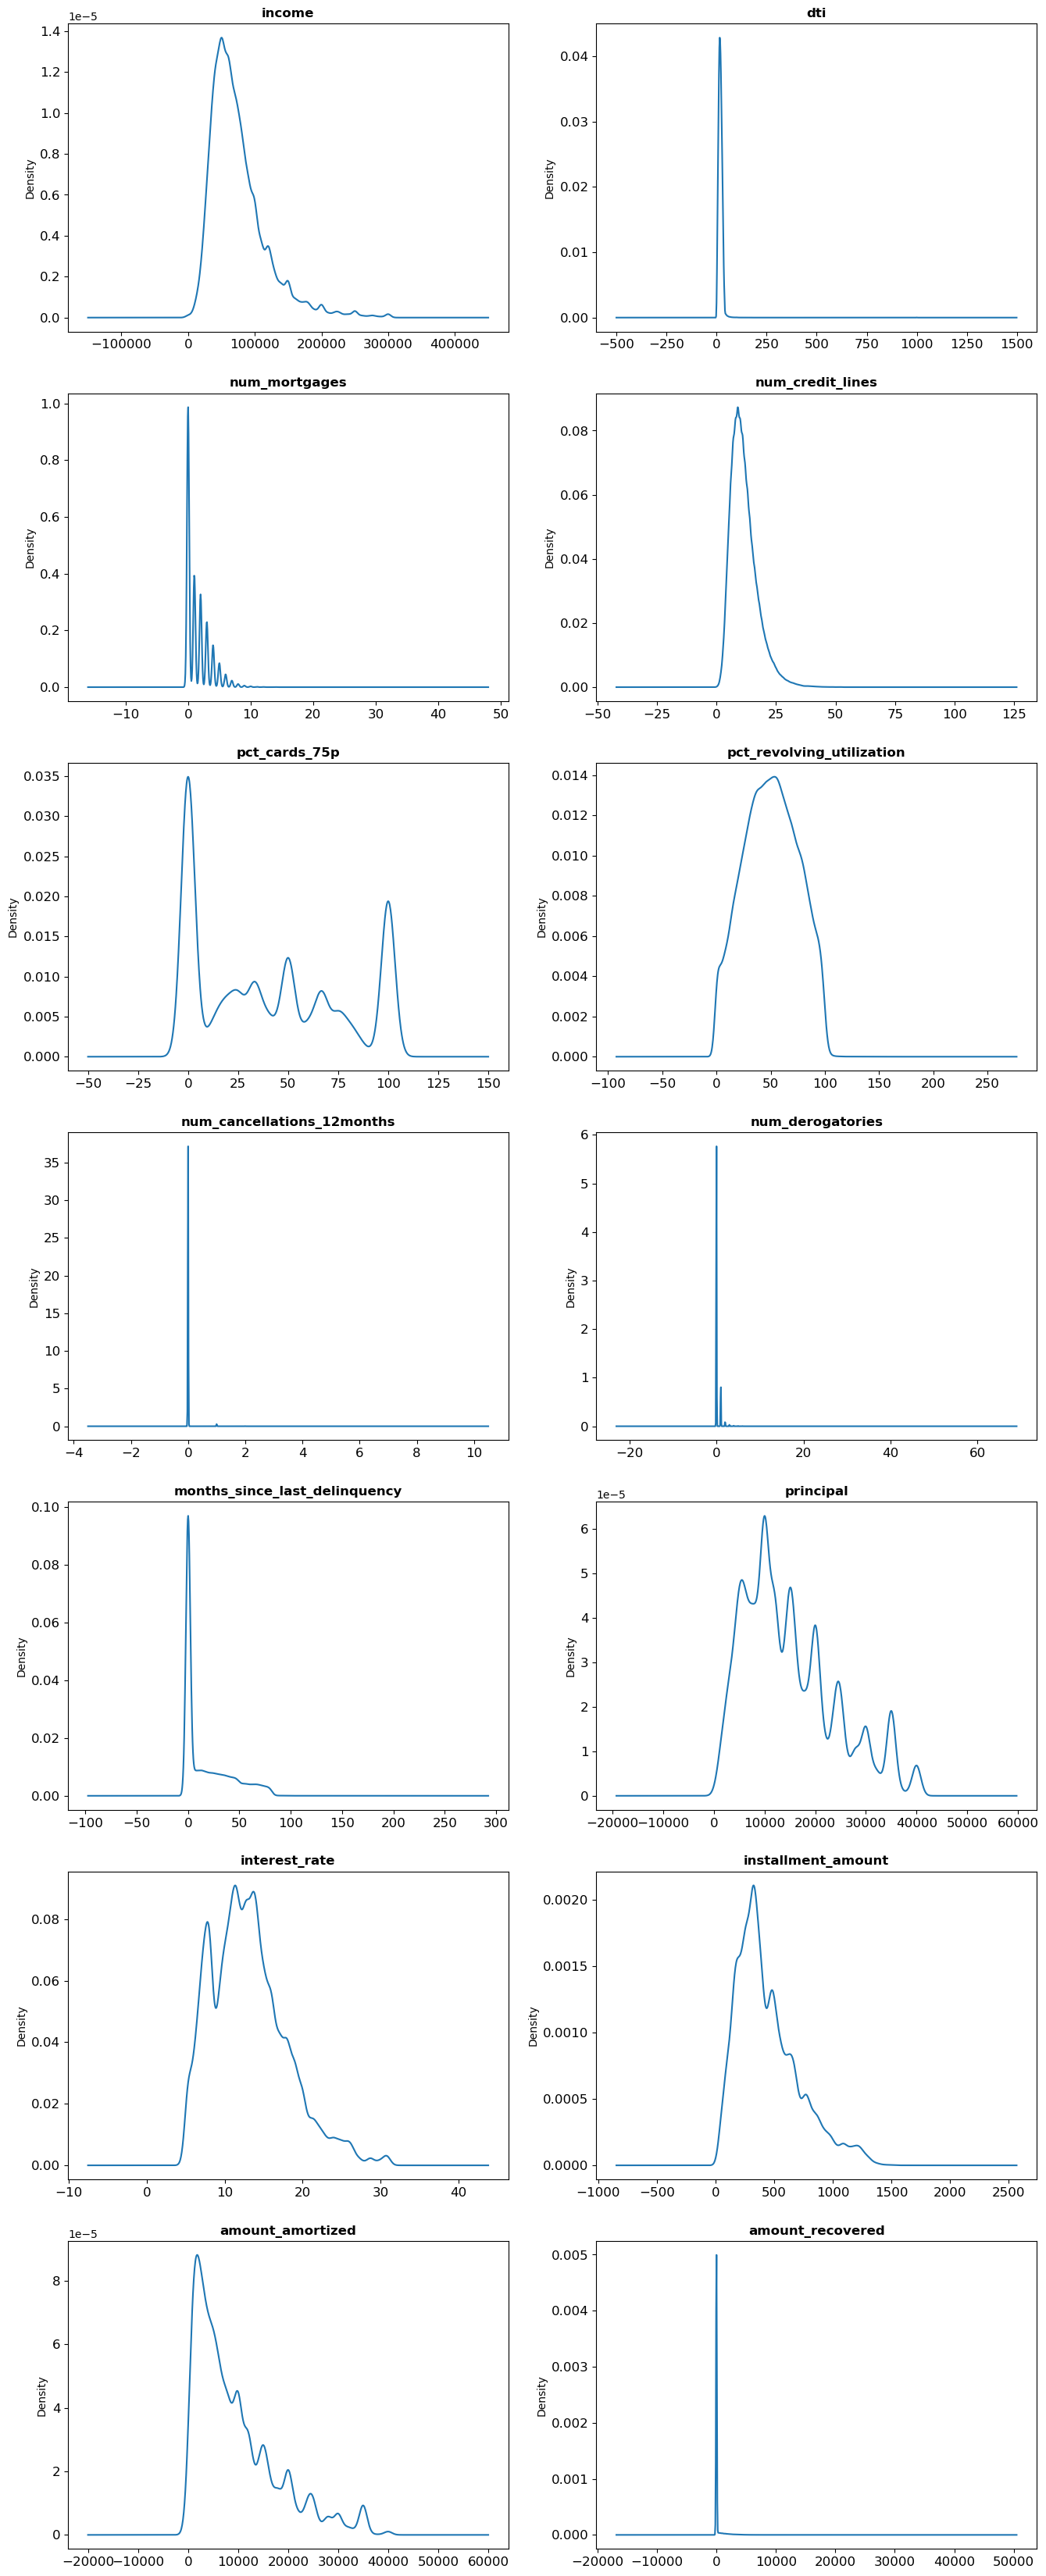

In [11]:
graph_eda_cont(num)

It's interesting to analyze the ratios of amount_amortized and amount_recovered. They're relevant to the target of the LGD model

In [12]:

ratios = num[['principal','amount_amortized','amount_recovered']].copy()
ratios['r_amortized_principal'] = ratios.amount_amortized / ratios.principal
ratios['r_recovered_principal'] = ratios.amount_recovered / ratios.principal


In [13]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
principal,"139,056.00","14,976.20","9,142.59",500.00,"8,000.00","12,800.00","20,000.00","40,000.00"
amount_amortized,"139,056.00","9,466.52","8,269.75",0.00,"3,000.00","7,000.00","13,689.47","40,000.00"
amount_recovered,"139,056.00",144.90,767.14,0.00,0.00,0.00,0.00,"33,666.34"
r_amortized_principal,"139,056.00",0.66,0.37,0.00,0.27,0.87,1.00,1.00
r_recovered_principal,"139,056.00",0.01,0.04,0.00,0.00,0.00,0.00,1.22


In [14]:
# num_derogatiories is binary
# check relationship between status and amount_recovered

In [15]:
temp = cat[['status']].merge(num[['amount_recovered']], left_index=True, right_index=True)
temp.groupby('status').amount_recovered.mean()

status
Charged Off                                                       1,225.55
Current                                                               0.00
Default                                                               0.00
Does not meet the credit policy. Status:Charged Off                 585.89
Does not meet the credit policy. Status:Fully Paid                    0.00
Fully Paid                                                            0.00
In Grace Period                                                       0.00
Late (16-30 days)                                                     0.00
Late (31-120 days)                                                    0.00
Name: amount_recovered, dtype: float64